In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [4]:
# Load data from Day 6 folder
prices = pd.read_csv("../day6_market_simulation/data/mid_price.csv")
positions = pd.read_csv("../day6_market_simulation/data/positions.csv")
trades = pd.read_csv("../day6_market_simulation/data/trades.csv")

print("Day 11 data loaded ✅")


Day 11 data loaded ✅


In [8]:
# Focus on RL agent (agent_id = 0)
rl_pos = positions[positions["agent_id"] == 0].merge(
    prices, on="time", how="left"
)

# Portfolio value = inventory × mid_price
rl_pos["portfolio_value"] = rl_pos["inventory"] * rl_pos["mid_price"]

# Buy & Hold benchmark
bh = prices.copy()
bh["portfolio_value"] = bh["mid_price"] - bh["mid_price"].iloc[0]

# Random benchmark (proxy using average inventory noise)
rand = positions.groupby("time")["inventory"].mean().reset_index()
rand = rand.merge(prices, on="time", how="left")
rand["portfolio_value"] = rand["inventory"] * rand["mid_price"]


In [9]:
# Extract buy/sell actions for RL agent
rl_trades = trades[trades["agent_id"] == 0]

buys = rl_trades[rl_trades["side"] == "buy"]
sells = rl_trades[rl_trades["side"] == "sell"]


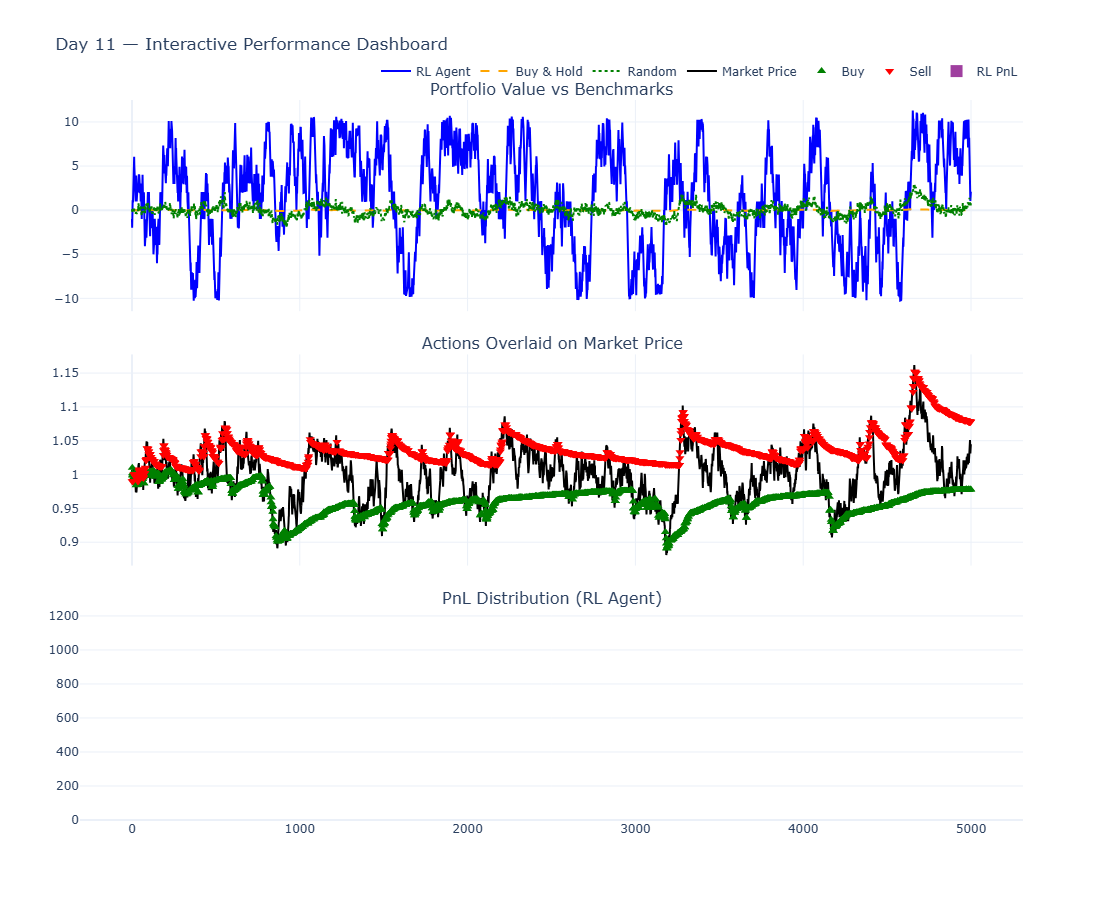

In [10]:
fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.06,
    subplot_titles=[
        "Portfolio Value vs Benchmarks",
        "Actions Overlaid on Market Price",
        "PnL Distribution (RL Agent)"
    ]
)

# -------------------------------
# Chart 1 — Portfolio Values
# -------------------------------
fig.add_trace(
    go.Scatter(
        x=rl_pos["time"],
        y=rl_pos["portfolio_value"],
        name="RL Agent",
        line=dict(color="blue")
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=bh["time"],
        y=bh["portfolio_value"],
        name="Buy & Hold",
        line=dict(color="orange", dash="dash")
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=rand["time"],
        y=rand["portfolio_value"],
        name="Random",
        line=dict(color="green", dash="dot")
    ),
    row=1, col=1
)

# -------------------------------
# Chart 2 — Price + Actions
# -------------------------------
fig.add_trace(
    go.Scatter(
        x=prices["time"],
        y=prices["mid_price"],
        name="Market Price",
        line=dict(color="black")
    ),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(
        x=buys["time"],
        y=buys["price"],
        mode="markers",
        name="Buy",
        marker=dict(symbol="triangle-up", color="green", size=8)
    ),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(
        x=sells["time"],
        y=sells["price"],
        mode="markers",
        name="Sell",
        marker=dict(symbol="triangle-down", color="red", size=8)
    ),
    row=2, col=1
)

# -------------------------------
# Chart 3 — PnL Distribution
# -------------------------------
pnl = rl_pos["portfolio_value"].diff().dropna()

fig.add_trace(
    go.Histogram(
        x=pnl,
        nbinsx=50,
        name="RL PnL",
        marker_color="purple",
        opacity=0.75
    ),
    row=3, col=1
)

# -------------------------------
# Layout
# -------------------------------
fig.update_layout(
    height=900,
    title="Day 11 — Interactive Performance Dashboard",
    hovermode="x unified",
    template="plotly_white",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

fig.show()
